<a href="https://colab.research.google.com/github/Agod1/Angular-AlbumStoreProductPage/blob/master/models_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow MobileNetV2 on CIFAR-10

In [1]:
# Imports Libraries

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = tf.keras.applications.mobilenet_v2.preprocess_input(x_train)
x_test = tf.keras.applications.mobilenet_v2.preprocess_input(x_test)
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

<ipython-input-3-19f168c04bff>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.2183 - loss: 2.1619 - val_accuracy: 0.2774 - val_loss: 2.0159
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.2791 - loss: 2.0026 - val_accuracy: 0.2832 - val_loss: 1.9836
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2870 - loss: 1.9696 - val_accuracy: 0.2847 - val_loss: 1.9723
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.2892 - loss: 1.9579 - val_accuracy: 0.2839 - val_loss: 1.9678
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2889 - loss: 1.9486 - val_accuracy: 0.2863 - val_loss: 1.9643


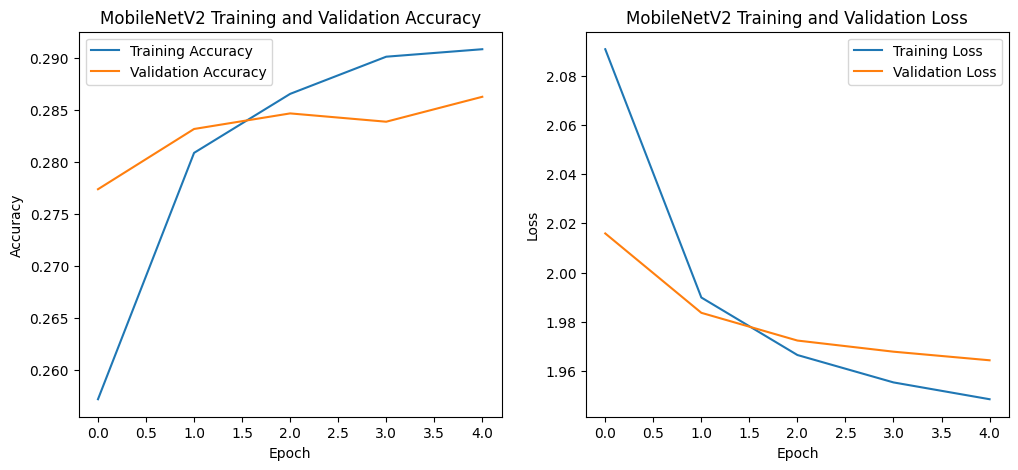

In [7]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MobileNetV2 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MobileNetV2 Training and Validation Loss')
plt.show()

In [8]:
# Predict on test data
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step


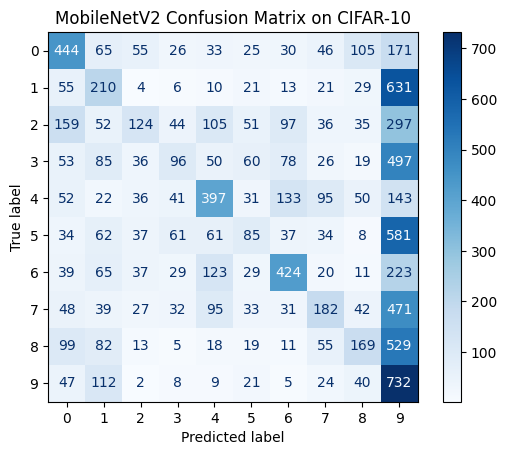

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("MobileNetV2 Confusion Matrix on CIFAR-10")
plt.show()

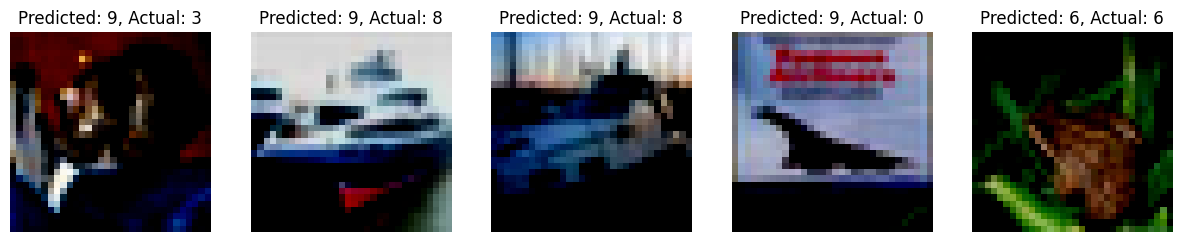

In [10]:
# Show sample predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i])
    ax.set_title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    ax.axis('off')
plt.show()


The MobileNetV2 model exhibited poor performance on the CIFAR-10 dataset from TensorFlow, as shown by the confusion matrix. Misclassifications were widespread across nearly all classes, indicating that the model struggled to accurately differentiate between the dataset’s diverse categories, such as animals and vehicles. This underperformance could stem from MobileNetV2's lightweight architecture, which, while efficient, may lack the complexity needed to capture the fine-grained features required for CIFAR-10’s small, detailed images. Overall, these results suggest that MobileNetV2 may not be well-suited for datasets like CIFAR-10 that require more nuanced feature extraction for accurate classification. Fine-tuning, longer epoch, or selecting a model with a deeper architecture might improve performance on this dataset.